# Exercice 1 - Titanic

Cet exercice représente une initiation à l'apprentissage machine profond (Deep Machine Learning / DML).

Basé sur une version modifiée du dataset titanic *(https://www.kaggle.com/c/titanic/data)*, je vais entraîner des modèles Denses (Couches cachées, Neurones, ...) afin de visualiser l'effet d'architectures sur l'entraînement d'un modèle prédisant la survie;

Afin d'y arriver, il lui faudra suivre la 'pipeline' de création de réseaux Denses suivante :

1. Afficher et expliquer le jeu de données à l'aide de la librairie Pandas
2. Préparer les données à l'aide de la librairie Numpy *(One Hot Encoding, Normalization, ...)*
3. [En boucle]
  * Créer l'architecture d'un modèle avec Keras
  * Compiler ce modèle (Loss, Optimisateur, metriques)
  * Entraîner & Évaluer en continue le modèle
  * Évaluer le modèle et le sauvegarder

*télécharger le jeu de données à partir d'un lien 'Google Drive'*

In [22]:
DATA_DIRECTORY = "/content/dataset.csv"
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1_3eN9Oyl_vy4ZfQ8t7xkEGQRcmUq_wcJ' -O "/content/dataset.csv"

--2024-12-10 16:46:39--  https://docs.google.com/uc?export=download&id=1_3eN9Oyl_vy4ZfQ8t7xkEGQRcmUq_wcJ
Resolving docs.google.com (docs.google.com)... 142.251.2.113, 142.251.2.102, 142.251.2.139, ...
Connecting to docs.google.com (docs.google.com)|142.251.2.113|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1_3eN9Oyl_vy4ZfQ8t7xkEGQRcmUq_wcJ&export=download [following]
--2024-12-10 16:46:39--  https://drive.usercontent.google.com/download?id=1_3eN9Oyl_vy4ZfQ8t7xkEGQRcmUq_wcJ&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 74.125.137.132, 2607:f8b0:4023:c03::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|74.125.137.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 124828 (122K) [application/octet-stream]
Saving to: ‘/content/dataset.csv’

/content/dataset.cs 100%[===================>] 121.90K  --.-KB/s    

## Étape 0. Importer les librairies *
Importez les librairies nécessaires pour l'exécution des étapes suivantes

In [23]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import save_model
from tensorflow.keras.models import load_model


## Étape 1. Analyser le jeu de données
**Travail à produire :**
1. Utilisez la librairie Pandas afin de charger les données (Load) et de les afficher.
3. Discutez des données et de leur utilité
2. À la fin du script, transformez ces données (Pandas DataFrame) sous un format Numpy (df.to_numpy())


**Explications :**

Bien que les données se doivent d'êtres traitées et manipulées afin d'être utilisées dans un modèle d'intelligence artificielle, il est nécessaire de faire un travail d'analyse sur celles-ci, limitant les entrées du modèle demandant plus de calculs.

Voici quelques exemples de questions pertinentes :
* Est-ce que tous les attributs aident à la prise de décision?
* Est-ce que certains attributs peuvent être combinés?
* À quoi correspondent chacun des attributs?
* Est-ce qu'un attribut est déterministe? (ex. Est-ce que le nom du modèle d'une voiture permet tout de suite de prédire le constructeur automobile?)

In [24]:
# Lire le dataset
dataset = pd.read_csv(DATA_DIRECTORY)

# Retire les NaN
dataset.dropna(axis='rows', inplace=True)

# Relache les colonnes non-necessaires
dataset.drop(labels=['Cabin','PassengerId', 'SibSp','Name', 'Parch', 'Salutation','Ticket','Is_Alone', 'Fare'], axis=1,inplace=True)
print(dataset)

# Convertit en Numpy
dataset_numpy = dataset.to_numpy()

     Unnamed: 0  Survived  Pclass     Sex   Age Embarked  Family Fare_Category
1             1       1.0       1  female  38.0        C     1.0          High
3             3       1.0       1  female  35.0        S     1.0          High
6             6       0.0       1    male  54.0        S     0.0          High
10           10       1.0       3  female   4.0        S     2.0      High_Mid
11           11       1.0       1  female  58.0        S     0.0      High_Mid
..          ...       ...     ...     ...   ...      ...     ...           ...
871         871       1.0       1  female  47.0        S     2.0          High
872         872       0.0       1    male  33.0        S     0.0           Low
879         879       1.0       1  female  56.0        C     1.0          High
887         887       1.0       1  female  19.0        S     0.0      High_Mid
889         889       1.0       1    male  26.0        C     0.0      High_Mid

[171 rows x 8 columns]


## Étape 2. Traitement des données
**Travail à produire :**
Utilisez la librairie Numpy afin de faire le traitement des données, ainsi que la séparation du dataset (Entraînement vs Test)


**Explications :**
La librairie Keras, utilisée pour bâtir nos modèles DNN, ne fonctione qu'avec des données mathématiques. Il est donc primordial de bien préparer le jeu de données (dataset) afin de n'avoir que des données numériques en entrée et en sortie. *(Hot Encoding, Normalisation, ...)*

In [25]:
# Retirer la colonne sans nom
dataset_tmp = dataset_numpy.copy()
dataset_tmp = dataset_tmp[ : , 1:]

# Diviser notre label (y) des attributs (X) pour pouvoir transformer les attributs
# sous des valeurs numeriques
X = dataset_tmp[ : , 1:]
y = dataset_tmp[ : , 0 ]


# 'One Hot Encoder' les valeurs de male et female (Colonne a l'index 1)
tmp = X[:,1]
tmp[tmp == 'male'] = 0
tmp[tmp == 'female'] = 1

# Normaliser , en supposant que l'age maximal que quelqu'un vit est environ 100 ans
X[: , 1] = tmp
X[:, 2] /= 100

# Isoler la colonne Embarquation
tmp_embarquation = X[:, 3]

# Chiffrer les valeurs C Q et S
tmp_embarquation[tmp_embarquation == 'C'] = 0
tmp_embarquation[tmp_embarquation == 'Q'] = 1
tmp_embarquation[tmp_embarquation == 'S'] = 2

# Effectuer le 'One Hot Encoding'
vecteur_one_hot_encoded = tf.one_hot(tmp_embarquation, depth=3)

# Retirer l'embarquement (Colonne a l'index 3)
X = np.delete(X, 3, axis=1)

# Ajouter le vecteur encode
X = np.concatenate( [X, vecteur_one_hot_encoded], axis=1)

# Convertir toutes les valeurs de la colonne 'Fare_Category' en one_hot_encoded
# Etape 1. Obtenir toutes les valeurs distinctes dans Fare_category
colonne_category = X[:, 4]
valeurs_uniques = np.unique( colonne_category )
for i in range(valeurs_uniques.shape[0]):
  colonne_category[colonne_category == valeurs_uniques[i]] = i

# Transformer sous la forme one_hot_encoding
one_hot_encoded = tf.one_hot(colonne_category, depth=np.unique(colonne_category).shape[0])

#Ajouter le nouveau vecteur 'one hot encoded' au reste du dataset
X = np.concatenate( [X, tf.one_hot(colonne_category, depth=np.unique(colonne_category).shape[0]) ], axis=1)

# Supprimer la colonne qui contenait les labels sous le format 'string'
X = np.delete(X, 4, axis=1)

print(X)

[[1 1 0.38 ... 0.0 0.0 0.0]
 [1 1 0.35 ... 0.0 0.0 0.0]
 [1 0 0.54 ... 0.0 0.0 0.0]
 ...
 [1 1 0.56 ... 0.0 0.0 0.0]
 [1 1 0.19 ... 1.0 0.0 0.0]
 [1 0 0.26 ... 1.0 0.0 0.0]]


In [26]:
print(X.shape)

(171, 11)


In [27]:
# Diviser les données en ensembles d'entraînement et de test (80% / 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(136, 11)
(35, 11)
(136,)
(35,)


## Étape 3. Création d'un modèle DNN -> (Classification)* Prédire la survie du passager
**Travail à produire :**
En suivant les étapes ci-dessous, je vais utiliser les librairies Keras et Tensorflow, créez un réseau de neurones denses simple (DNN) afin de prédire la survie d'un passager

### 3.1 Créer le modèle
**Travail à produire**

Utilisez les méthodes séquentielles et fonctionnelles afin de faire la création de deux architectures de réseaux denses (DNN) suivants :

*Modèle 1*
* Input (Entrée)
* Couche Cachée (Hidden Layer) à 512 neurones, à fonction d'activation 'RELU'
* Output (Sortie)

*Modèle 2*
* Input (Entrée)
* Couche cachée (Hidden Layer) à 256 neurones, à fonction d'activation 'RELU'
* Couche cachée (Hidden Layer) à 512 neurones, à fonction d'activation 'RELU'
* Couche cachée (Hidden Layer) à 256 neurones, à fonction d'activation 'RELU'
* Output (Sortie)

In [28]:
# Definition du premier modele
def create_model1():
  # Creer un block pour contenir l'input (11 attributs en entree)
  # Changed: shape should be a tuple, even for a single dimension
  block_input = tf.keras.Input(shape=(11,))

  # Creer la premiere couche cachee avec 512 neurones et la fonction "relu" en activation
  hidden_layer1 = tf.keras.layers.Dense(512, 'relu')(block_input)

  # Creer la couche de sortie, contenant 1 valeur aue l'on veut predire avec la fonction d'activation "sigmoid"
  output = tf.keras.layers.Dense(1,'softmax')(hidden_layer1)

  # A partir des blocks precedents, creer un nouveau model et le retourner
  model = tf.keras.Model(inputs=block_input, outputs=output)
  return model




def create_model2():
  # Changed: shape should be a tuple, even for a single dimension
  block_input = tf.keras.Input(shape=(11,))
  hidden_layer1 = tf.keras.layers.Dense(256, 'relu', name='h1')(block_input)
  hidden_layer2 = tf.keras.layers.Dense(512, 'relu', name='h2')(hidden_layer1)
  hidden_layer3 = tf.keras.layers.Dense(256, 'relu', name='h3')(hidden_layer2)
  output = tf.keras.layers.Dense(1, 'sigmoid')(hidden_layer3)
  model = tf.keras.Model(inputs=block_input, outputs=output)
  return model


test_model1 = create_model1()
test_model1.summary()

test_model2 = create_model2()
test_model2.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)           │ (None, 11)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 512)                 │           6,144 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,657 (26.00 KB)

 Trainable params: 6,657 (26.00 KB)

 Non-trainable params: 0 (0.00 B)

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)           │ (None, 11)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ h1 (Dense)                           │ (None, 256)                 │           3,072 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ h2 (Dense)                           │ (None, 512)                 │         131,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ h3 (Dense)                           │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 266,241 (1.02 MB)

 Trainable params: 266,241 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

### 3.2 Entraîner le modèle
**Travail à produire :**

1. Compilez le modèle en définissant la fonction de perte (Loss), l'optimisateur et ses paramètres (Adam, SGD, Learning Rate, ...), ainsi que les métriques qui sont évalués durant l'entraînement pour suivre l'entraînement du modèle
2. Lancer l'entraînement pour *n* époques

In [29]:
test_model1.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate=1e-2),
    loss='binary_crossentropy',
    metrics=['mean_absolute_error', 'mean_squared_error']
)

hist = test_model1.fit(
	x=np.asarray(X_train).astype(np.float32),
	y=np.asarray(y_train).astype(np.float32),
	batch_size=0,
	epochs=25,
	validation_split=0.1

)


Epoch 1/25


/usr/local/lib/python3.10/dist-packages/keras/src/ops/nn.py:545: UserWarning: You are using a softmax over axis -1 of a tensor of shape (None, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 73ms/step - loss: 0.6816 - mean_absolute_error: 0.3197 - mean_squared_error: 0.3197 - val_loss: 0.5645 - val_mean_absolute_error: 0.3571 - val_mean_squared_error: 0.3571
Epoch 2/25
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.5238 - mean_absolute_error: 0.3426 - mean_squared_error: 0.3426 - val_loss: 0.4980 - val_mean_absolute_error: 0.3571 - val_mean_squared_error: 0.3571
Epoch 3/25
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.4485 - mean_absolute_error: 0.3093 - mean_squared_error: 0.3093 - val_loss: 0.4559 - val_mean_absolute_error: 0.3571 - val_mean_squared_error: 0.3571
Epoch 4/25
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.3673 - mean_absolute_error: 0.2936 - mean_squared_error: 0.2936 - val_loss: 0.4604 - val_mean_absolute_error: 0.3571 - val_mean_squared_error: 0.3571
Epoch 5/25
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.4219 - mean_absolute_error: 0.2916 - mean_squared_error: 0.2916 - val_loss: 0.4791 - val_mean_absolute_error: 0.3571

### 3.3 Évaluation et sauvegarde du modèle
**Travail à produire :**

1. Sauvegardez le modèle avec l'utilisation de la fonction *save_model* du *module tensorflow.keras.models*
2. Loadez le modèle à partir du fichier créé précédemment et faites prédiction sur la première donnée du jeu de données *test*
3. Discutez des résultats obtenus

In [30]:
# Sauvegarde du modèle
save_model(test_model1, '/content/Modele_DNN/test_model1.keras')

In [31]:
# Charger le modèle
model_loaded = load_model('/content/Modele_DNN/test_model1.keras')

# Vérification
print(model_loaded.summary())


Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)           │ (None, 11)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 512)                 │           6,144 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 19,973 (78.02 KB)

 Trainable params: 6,657 (26.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 13,316 (52.02 KB)

None


In [34]:
# Faire des prédictions
predictions = model_loaded.predict(X_test.astype(np.float32))

# Afficher les résultats
print("Prédictions :")
print(predictions)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Prédictions :
[[0.99999994]
 [0.99999994]
 [0.99999994]
 [0.99999994]
 [0.99999994]
 [0.99999994]
 [0.99999994]
 [0.99999994]
 [0.99999994]
 [0.99999994]
 [0.99999994]
 [0.99999994]
 [0.99999994]
 [0.99999994]
 [0.99999994]
 [0.99999994]
 [0.99999994]
 [0.99999994]
 [0.99999994]
 [0.99999994]
 [0.99999994]
 [0.99999994]
 [0.99999994]
 [0.99999994]
 [0.99999994]
 [0.99999994]
 [0.99999994]
 [0.99999994]
 [0.99999994]
 [0.99999994]
 [0.99999994]
 [0.99999994]
 [1.        ]
 [1.        ]
 [1.        ]]


/usr/local/lib/python3.10/dist-packages/keras/src/ops/nn.py:545: UserWarning: You are using a softmax over axis -1 of a tensor of shape (32, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/ops/nn.py:545: UserWarning: You are using a softmax over axis -1 of a tensor of shape (None, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


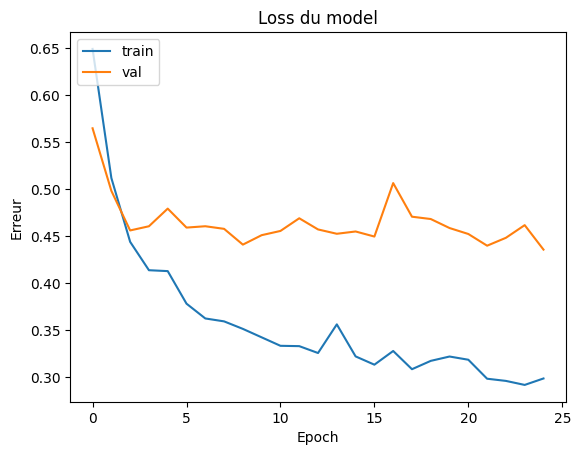

In [37]:
#Discutez des résultats obtenus

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Loss du model')
plt.ylabel('Erreur')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()